# Preprocessing

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os


In [2]:
#Remove irrelevent features, fill NaN, reset index, set dtypes
titanic = pd.read_csv('titanic_train.csv')
del titanic['Name']
del titanic['Cabin']
del titanic['Ticket']
titanic = titanic.set_index('PassengerId')
titanic = titanic.fillna('0')
titanic.Age = titanic.Age.astype('int64')
titanic.head()

"""
#method to perform onehotencoding within pandas
titanicdumm = pd.get_dummies(titanic)
titanicdumm.head()

x= pd.cut(titanic.Fare, [0,15,31,150, 600], labels = [0, 1, 2, 3])
x = pd.get_dummies(x)
x.columns  = ['poor','middle', 'rich', 'moneybags']
frames = [titanicdumm, x]
titanic = pd.concat(frames, axis = 1)
del titanic['Fare']
titanic.head()"""

#Change categorical variables to integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
titanic.Sex = le.fit_transform(titanic.Sex)
titanic.Embarked = le.fit_transform(titanic.Embarked)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22,1,0,7.2500,3
2,1,1,0,38,1,0,71.2833,1
3,1,3,0,26,0,0,7.9250,3
4,1,1,0,35,1,0,53.1000,3
5,0,3,1,35,0,0,8.0500,3


Maybe a logisttic regr Age, SibSp, Gender to start out?

# Data Analysis

In [3]:
df = titanic.drop(['Pclass','Parch','Fare'], axis = 1)

### Things to look at:

Subcombinations of age,  gender, sibsp,

In [4]:
df.head()

,Survived,Sex,Age,SibSp,Embarked
PassengerId,,,,,
1,0,1,22,1,3
2,1,0,38,1,1
3,1,0,26,0,3
4,1,0,35,1,3
5,0,1,35,0,3


# Logisitic Regression

In [23]:
#Use all features in train test split
from sklearn.model_selection import train_test_split
X = df.iloc[:,1:]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

#instantiate logistic regressor and fit to training data. Accuracy_score is testing measure.
from sklearn.linear_model import LogisticRegressionCV
log  = LogisticRegressionCV(random_state =0)
log.fit(X_train, y_train)
c= log.score(X_test, y_test)
print(c)

0.77130044843


### Will changing feature inputs boost accuracy?


#### The highest scoring models have all of the data. Need to make sure that the Logistic regressor is being reset each pass through the loop

We can also see that gender creates a significant accuracy boost. classifiers dropped saw an 18% drop in accuracy without the gender info. We will need a more robust method in the future to test the benefit of adding a feature into the model.


VERY INFORMATIONAL: GENDER and EMBARKED


## Logistic Regression on Age in each of the Sex SubSets

# Logistic Regression Decision Boundaries

### Age vs Embarked
If your embarked status is in [2,3] youre dead.

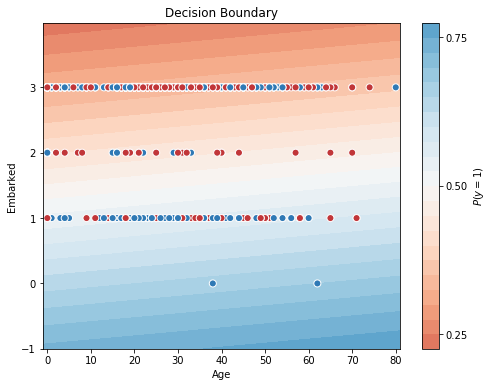

In [6]:
os.chdir('C:\\Users\\Harrison\\Documents\\GitHub\\ML-Notes')
from VisualFuncs import Visual_Logistic

l = LogisticRegressionCV()
l.fit(X.iloc[:,[1,3]], y)
Visual_Logistic(X.iloc[:,[1,3]], y, l)
    

## Age vs Gender
If youre a man... youre dead.

## Sib Sp vs Embarked
More siblings means more likely to be dead.

## With LDA
Can we improve the model by Linear Discriminant Analysis at the cost of interpretability?
Probably not since we are dealing with a bunch of categorical data, but it is good practice, so lets do it.


Rats! Oh Well,  on to Decision Trees...

# Decision Trees

In [7]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)


0.73542600896860988

Trees did worse than logistic regression... But i bet we are overfitting, maybe if we reduce the number of features to just sex age and embarked...

#### Input = [Sex,  Age, SibSp]


In [8]:
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train.iloc[:,[0,1,2]], y_train)
tree.score(X_test.iloc[:,[0,1,2]], y_test)


0.74439461883408076

Good boost! now lets try just Sex and SibSp

#### Input = [Sex, SibSp]

In [24]:
tree = DecisionTreeClassifier(max_depth=1,random_state = 0)
tree.fit(X_train.iloc[:,[0,2]], y_train)
tree.score(X_test.iloc[:,[0,2]], y_test)


0.76681614349775784

In [10]:
import os
os.chdir('C:\\Users\\Harrison\\Documents\\GitHub\\ML-Notes\\Titanic')

In [22]:

from sklearn.tree import export_graphviz
import graphviz
with open('Titanic_tree.txt','w') as tx:
    dot_data = export_graphviz(tree, out_file=tx)


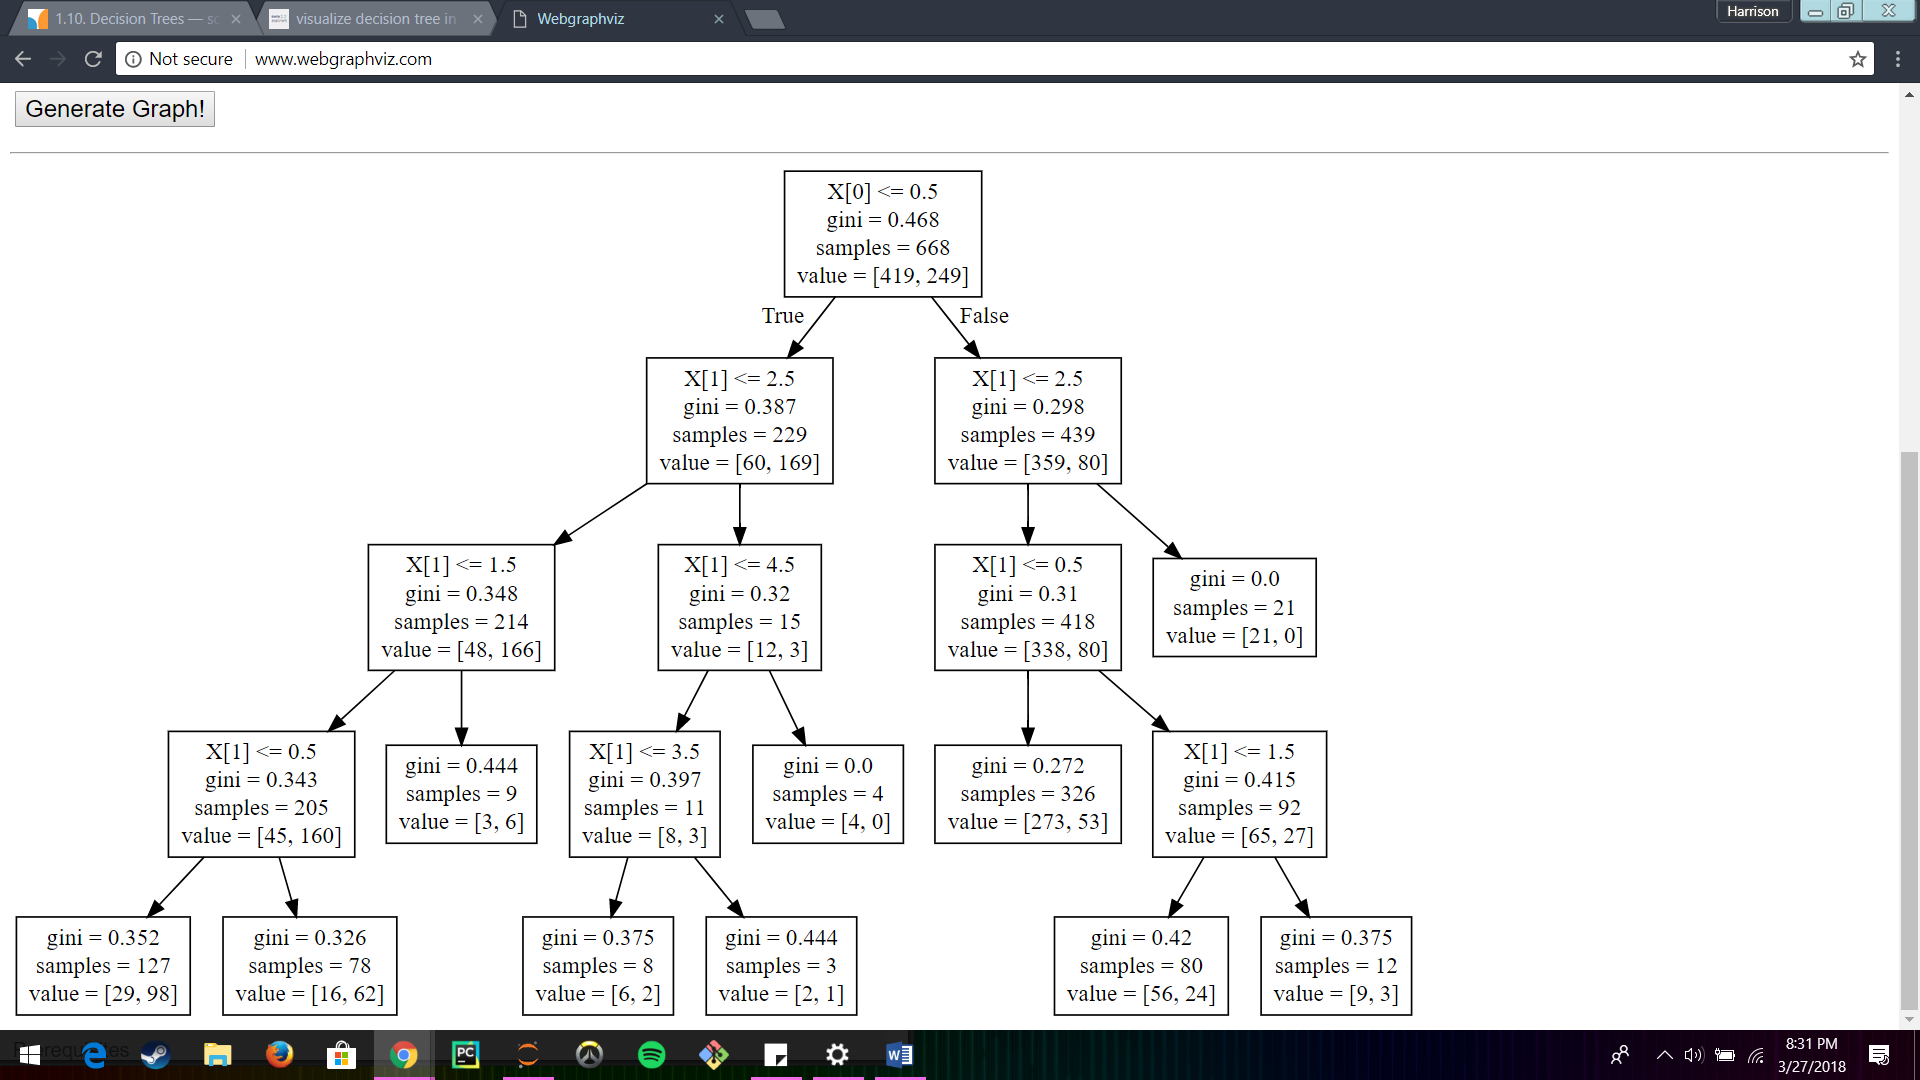

So I couldnt figure out 